# Daily Mix Playlist Exploratory Data Analysis (EDA)
### Ange Olson

## Intro

I recently got back into analyzing my Spotify data and wanted to compare my listening habits to the general population’s. Additionally, while I could probably have a greater diversity in musical taste, I was curious to see how traits of the music I listened to varied across different segments of what I listen to. 

Every day, Spotify creates “Daily Mix” playlists for its listeners based on their music tastes, theoretically separated into similar segments. Additionally, Spotify creates a playlist for the public of the top 50 songs in the United States. For one day, I pulled the data for six Daily Mixes belonging to me and the top 50 songs down and got to work.

Below, I provide the results of EDA I performed on six Daily Mix playlists, as well at the US Top 50 playlist from the same time (April 24th, 2022).


## Playlist Description

I’ll admit, the differences between some of my daily playlists aren’t all that drastic. However, I’d roughly categorize them as follows:

Daily Mix 1: Alt-Rock and Dance. This playlist features Spoon, Cage the Elephant, and the Strokes—all artists I’d firmly categorize as traditional alt-rock. Wet Leg also features, who while being somewhat later on the scene, definitely shares some of the characteristics of the artists mentioned formerly. Also notable are LCD Soundsystem, MGMT, and COIN, who tend to put out more songs I’d play at a party. A healthy mix.

Daily Mix 2: Still Alt, More Indie. The biggest names on this playlist I recognize are alt-J, Death Cab for Cutie, Belle and Sebastian, and Voxtrot. Still firmly in alternative, but lots of indie influences and who I would consider newer (at least, to me) indie artists, like fanclubwallet. I’m expecting these songs to be a bit more mellow than Mix 1.

Daily Mix 3: 70s/80s Rock. With a few exceptions (looking at you, Cut Worms), this playlist is pretty straightforward—Billy Joel, Queen, The Beatles, T. Rex, The Rolling Stones, David Bowie…you get the point.

Daily Mix 4: I Wanna Say…Indie Pop? Here we’re getting more into indie pop, and a few of these songs strike me particularly as bedroom pop, with a few outliers. Notable and repeat artists include Fruit Bats, Wallows, Del Water Gap, and Cut Worms. 

Daily Mix 5: The Punk One. While the music in the playlist spans across different decades, it’s mostly concentrated in the 70s and 80s and it’s undeniably punk and maybe a little new wave—the early sounding punk, at least. Television, the Clash, Velvet Underground, Buzzcocks, Talking Heads. 

Daily Mix 6: More Indie, Less Pop? I’ll be honest, I don’t see a real defining line here. There’s Cage the Elephant, Post Animal, The Growlers…it’s not as pop as #4, not as rock mellow as #2, not as rock as #1, so I’m just gonna have to call it indie and avoid too many more distinctions than that.

Top 50: It’s What You Expect. Apart from a couple of songs, it’s stuff I really don’t know. Rap, hip hop, pop, basically what you’d hear on the radio if you still did that sort of thing. 


## Takeaways

Fortunately for analysis, all these playlist are exactly 50 songs long so we’re dealing with a perfectly balanced dataset. It’s also a lot easier to visually see the differences between playlists—if there are any. Unsurprisingly, not a lot of major differences occur across the board for my Daily Mix playlists, but below are the biggest differences/takeaways:

Song Age: Playlists 3 and 5 are the oldest, and also encompass the greatest range of song release dates. #1, which had more of that “classic” alt-rock sound was the third oldest. No song on the top 50 list was older than 2005. 

Danceability and Tempo: Turns out, people can dance to the top 50 songs more than they can my music. Based on the results, I should probably queue up songs from playlist #1 if someone does put me on aux, but the differences are tiny.

Duration: The top 50 songs are, on average, shorter than what I listen to, across the board. 

Popularity: I think 2 pictures are worth two thousand words here. The first image is a scatterplot showing the relationship between artist popularity and track popularity. It’s not a perfectly linear relationship, and there are a few outliers, but it’s close. Notice what playlist leads the pack 


## Data Prep

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("all_mixes.csv")
sns.set_theme(style="darkgrid", palette="Paired")

# clean  date 
from datetime import datetime

#def cleanDfDate(row):
  #date = row["release_date"]

  #date = date.strip()
  #if len(date) > 6: return datetime.strptime(date, '%Y-%m-%d')
  #return

#df["release_date"] = df.apply(cleanDfDate, axis=1)

def extractYear(row):
  date = row["release_date"]
  date = date[0:4]
  date = date.strip()
  if len(date) > 3: return datetime.strptime(date, '%Y').year
  
  return np.NaN

df["release_year"] = df.apply(extractYear, axis=1)

In [2]:
df['popDif'] = df['artist_pop'] - df['track_pop']
 # if positive, artist is more pop. than the given track
 # if neg, track more pop than artist typically is 

## Basic Plot

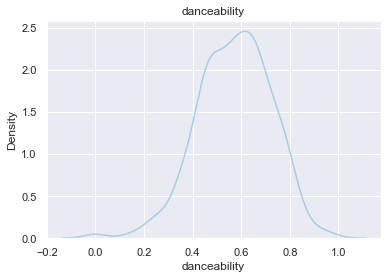

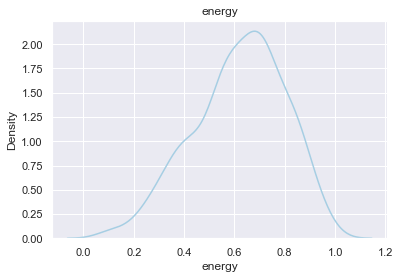

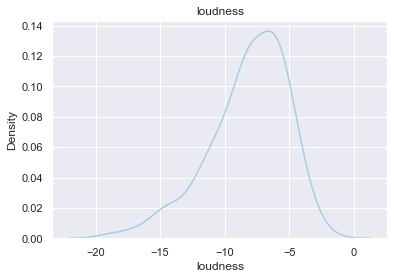

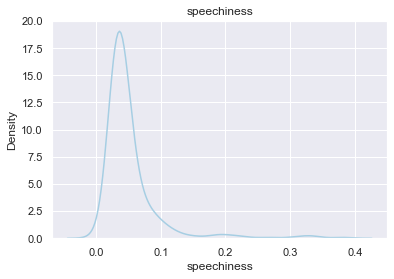

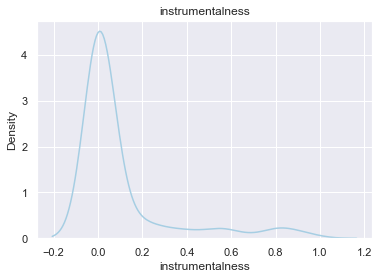

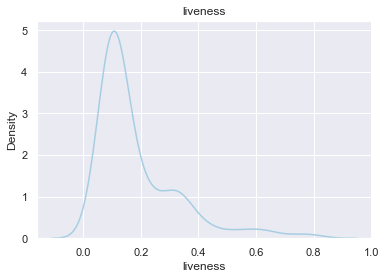

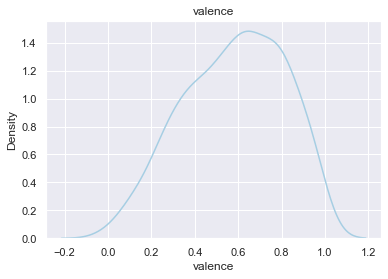

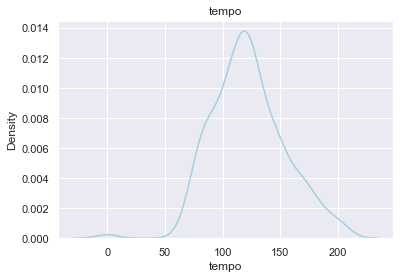

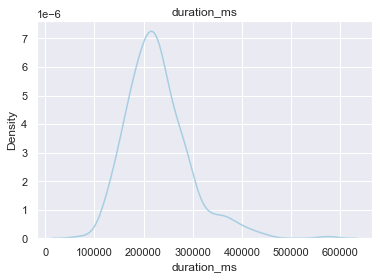

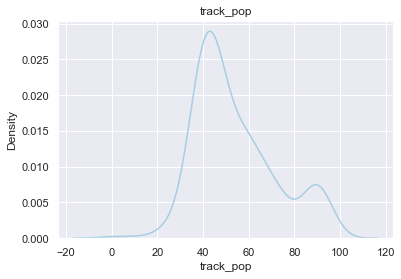

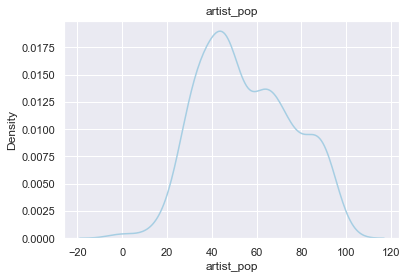

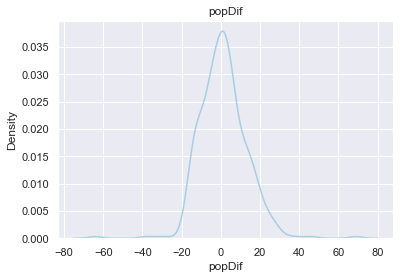

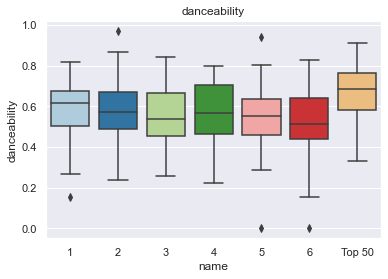

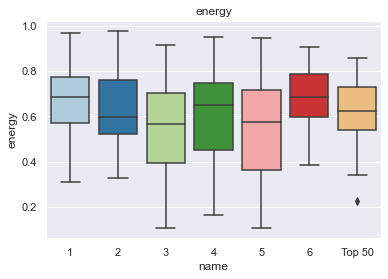

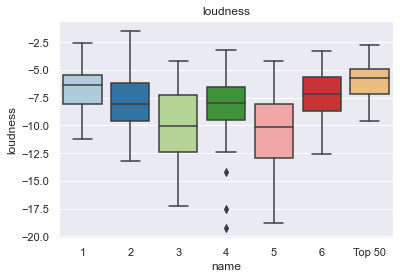

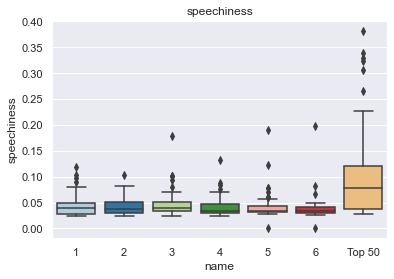

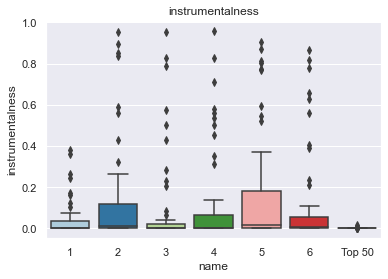

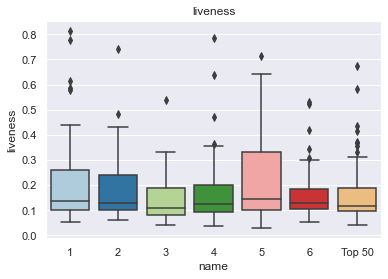

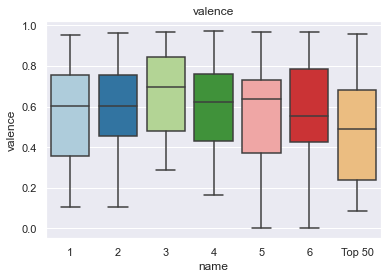

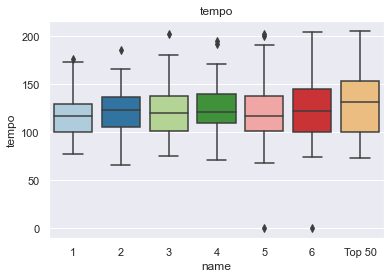

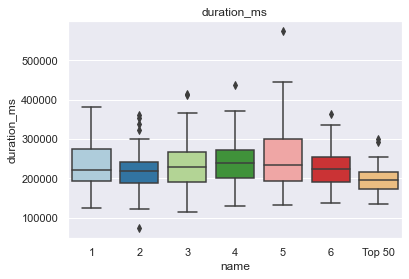

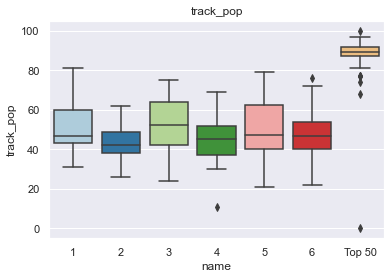

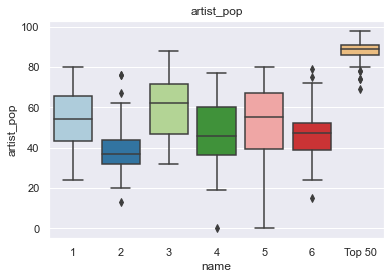

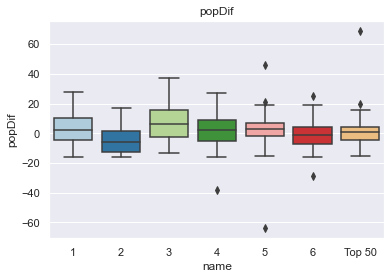

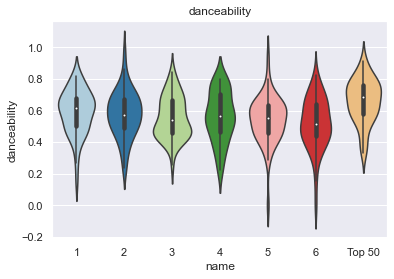

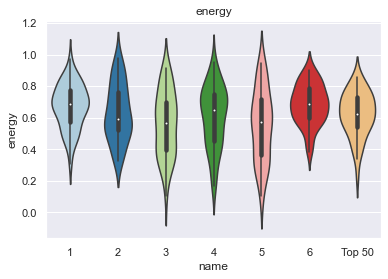

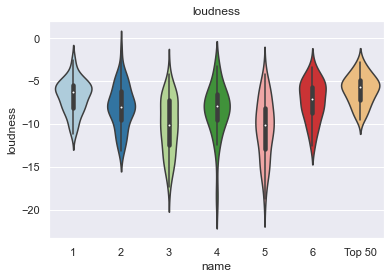

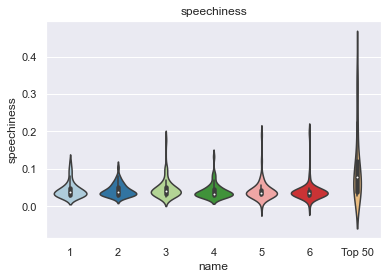

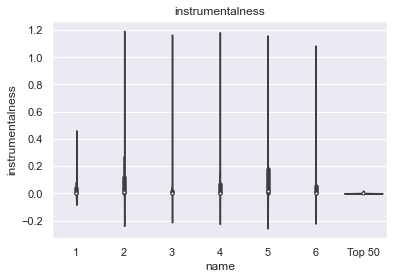

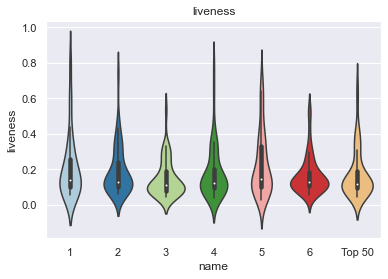

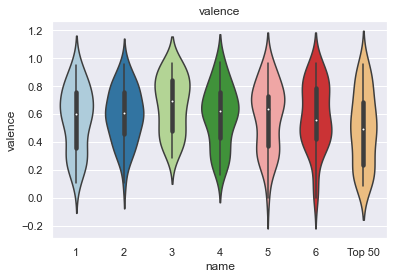

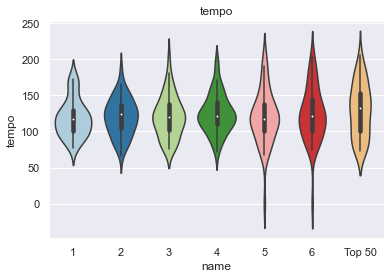

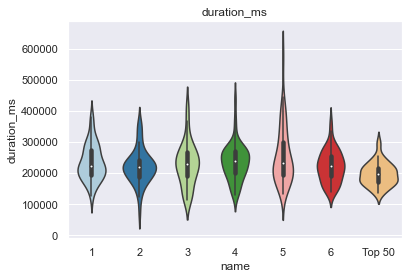

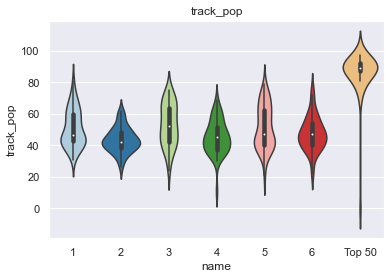

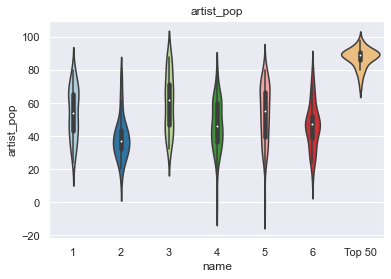

In [3]:
list = ('danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'track_pop', 'artist_pop', 'popDif')
for var in list:
    sns.kdeplot(data = df, x= var).set(title = var)
    plt.show()

for var in list:
    ax = sns.boxplot(x='name',y=var, data=df)
    ax.set(title = var)
    ax.set_xticklabels(["1", "2", "3", "4", "5", "6", "Top 50"])
    plt.show()

for var in list:
    ax = sns.violinplot(x='name',y=var, data=df)
    ax.set(title = var)
    ax.set_xticklabels(["1", "2", "3", "4", "5", "6", "Top 50"])
    plt.show()

## Scatterplots

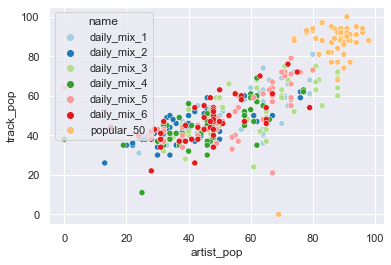

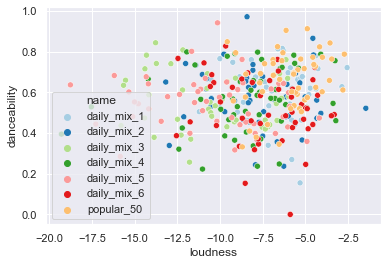

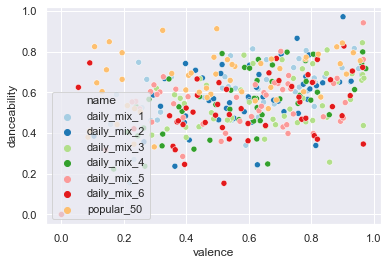

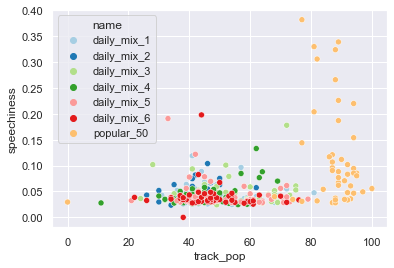

In [ ]:
sns.scatterplot(x='artist_pop',y='track_pop', hue = 'name', alpha = 1, data=df)
plt.show()

sns.scatterplot(x='loudness',y='danceability', hue = 'name', alpha = 1, data=df)
plt.show()


sns.scatterplot(x='valence',y='danceability', hue = 'name', alpha = 1, data=df)
plt.show()

sns.scatterplot(x='track_pop',y='speechiness', hue = 'name', alpha = 1, data=df)
plt.show()

## Correlation

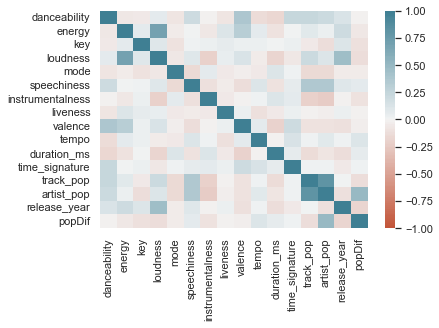

In [ ]:
matrix = df.corr().round(2)
ax = sns.heatmap(
    matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False, annot=False
)

## Release Year Analysis

<AxesSubplot:xlabel='release_year', ylabel='danceability'>

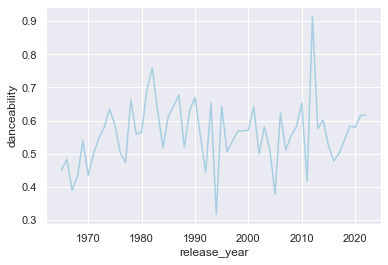

In [ ]:
table = pd.pivot_table(df, index = 'release_year')
sns.lineplot(data=table, x="release_year", y="danceability")

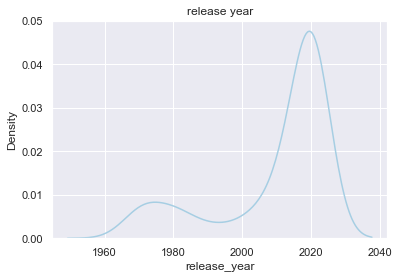

In [ ]:
sns.kdeplot(data = df, x= 'release_year').set(title = "release year")
plt.show()

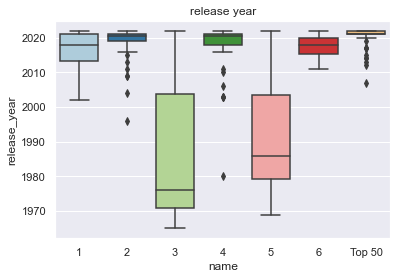

In [ ]:
ax = sns.boxplot(x='name',y='release_year', data=df)
ax.set(title = "release year")
ax.set_xticklabels(["1", "2", "3", "4", "5", "6", "Top 50"])
plt.show()